In [2]:
import pandas as pd
import numpy as np

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
# Pima Indians Diabetes Database
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
df = pd.read_csv('/Users/songjunwoo/Documents/ai/Datasets/diabetes.csv')
df.head()
# Pregnancies: 임신 횟수
# Glucose: 혈중 포도당 농도
# BloodPressure: 혈압(mm Hg)
# SkinThickness: 삼두근 피부 두께(mm)
# Insulin: 혈청 인슐린(muU/ml)
# BMI: 체질량 지수
# DiabetesPedigreeFunction: 당뇨병 가족력
# Age: 나이
# Outcome: 결과 분류값

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.shape

(768, 9)

In [26]:
# 특성과 레이블 분리
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values
print(X[0,:])
print(y[0])

[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
1


In [30]:
# 훈련데이터, 테스트데이터 분리
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=1234
)

In [38]:
# KNN 분류기 가여조기
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier(n_neighbors=3) # 가까운 이웃의 수 K=3(Hyper Parameter)

# 학습 고고
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
# 학습셋으로 예측 계산해보고 점수 확인하기
train_score = knn.score(X_train, y_train)
print(train_score)

0.8045602605863192


In [50]:
# 테스트셋으로 예측 계산해보고 점수 확인하기
test_score = knn.score(X_test, y_test)
print(test_score)

0.7272727272727273


In [52]:
# 이웃의 수 늘린 후 다시 점수 확인해보기

In [56]:
# 최적의 이웃 수 찾아보기
print(np.arange(1,11))

[ 1  2  3  4  5  6  7  8  9 10]


In [58]:
for k in np.arange(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    print(f'K: {k}, Train: {train_score}, Test: {test_score}')

K: 1, Train: 1.0, Test: 0.6428571428571429
K: 2, Train: 0.8338762214983714, Test: 0.7142857142857143
K: 3, Train: 0.8517915309446255, Test: 0.6753246753246753
K: 4, Train: 0.8224755700325733, Test: 0.7012987012987013
K: 5, Train: 0.8045602605863192, Test: 0.7272727272727273
K: 6, Train: 0.7882736156351792, Test: 0.7662337662337663
K: 7, Train: 0.7899022801302932, Test: 0.7337662337662337
K: 8, Train: 0.7882736156351792, Test: 0.7402597402597403
K: 9, Train: 0.7768729641693811, Test: 0.7402597402597403
K: 10, Train: 0.7768729641693811, Test: 0.7402597402597403


In [60]:
# 측정 결과 점수를 배열에 담아 시각화해보기
k_values = np.arange(1, 11)
train_scores = np.empty(len(k_values))
test_scores = np.empty(len(k_values))


for i,k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_scores[i] = knn.score(X_train, y_train)
    test_scores[i] = knn.score(X_test, y_test)

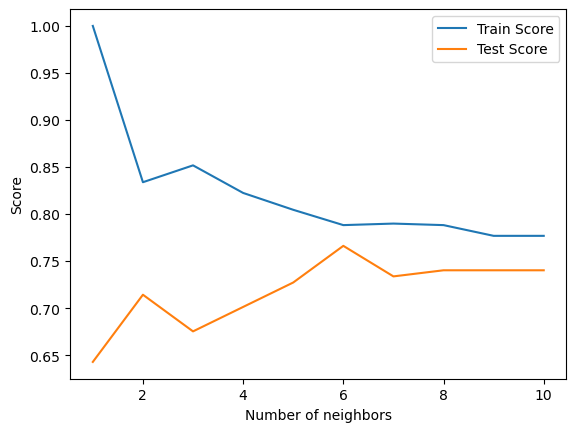

In [62]:
# 차트 그려보기 
plt.plot(k_values, train_scores, label='Train Score')
plt.plot(k_values, test_scores, label='Test Score')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Score')
plt.show()

In [64]:
# K가 6일때 가장 정확함 = Overfitting - Underfitting이 가장 작다.
# K가 6일때의 점수 확인
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print(f'K: {k}, Train: {train_score}, Test: {test_score}')

K: 10, Train: 0.7882736156351792, Test: 0.7662337662337663
